In [1]:
import sys
sys.path.append("..")

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

tqdm.pandas()

In [3]:
ratings_df = pd.read_csv("../data/ml-25m/ratings.csv")
movie_df = pd.read_csv("../data/ml-25m/movies.csv")

In [ ]:
movie_df.genres = movie_df.genres.progress_apply(lambda s: s.split("|"))
movie_df = pd.concat([movie_df, pd.get_dummies(movie_df.genres.explode()).groupby(level=0).sum()], axis=1)

all_genres = movie_df.genres.explode().unique().tolist()

ratings_df = pd.merge(ratings_df, movie_df, on="movieId", how="left")

In [41]:
a = ratings_df.groupby("userId")[all_genres].sum()
row_sum = a.sum(axis=1)
for genre in all_genres:
    a[genre] /= row_sum
genre_var = a.var(axis=1).rename("genre_var")
user_occur = ratings_df.userId.value_counts().sort_index().rename("review_count")

df = pd.concat([genre_var, user_occur], axis=1)
df

,genre_var,review_count
userId,,
1,0.006177,70
2,0.002665,184
3,0.002440,656
4,0.002677,242
5,0.003086,101
...,...,...
162537,0.003776,101
162538,0.003656,154
162539,0.003028,47


In [6]:
df[df.review_count <= 1000].corr()

,genre_var,review_count
genre_var,1.000000,-0.189857
review_count,-0.189857,1.000000


In [71]:
sample_size = 1000
mean_var_x = []
mean_var_y = []
for i in tqdm(range(20, 1001, 10)):
    s = 0
    for _ in range(sample_size):
        v = [0] * len(all_genres)
        for _ in range(i):
            v[random.randrange(len(all_genres))] += 1 / i
        s += np.array(v).var()
    s /= sample_size
    mean_var_x.append(i)
    mean_var_y.append(s)

100%|██████████| 99/99 [00:14<00:00,  6.96it/s]


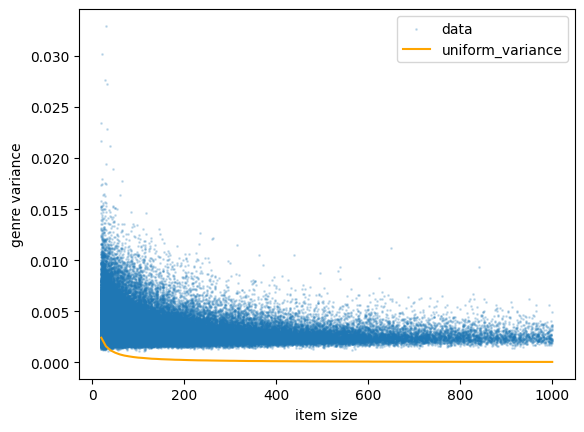

In [75]:
a = df[df.review_count <= 1000]
plt.scatter(a.review_count, a.genre_var, alpha=0.2, s=1, label="data")
plt.plot(mean_var_x, mean_var_y, c="orange", label="uniform_variance")
plt.xlabel("item size")
plt.ylabel("genre variance")
plt.legend()